Bài 1 : Viết chương trình thực hiện tích chập để trích xuất đặc trưng ảnh bằng các filter, nêu tác dụng của từng filter (tự tìm ảnh để test)


(630, 1200, 4)
(630, 1200)


Text(0.5, 1.0, 'Horizontal Filter')

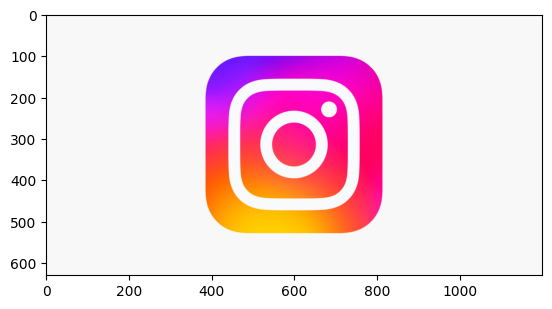

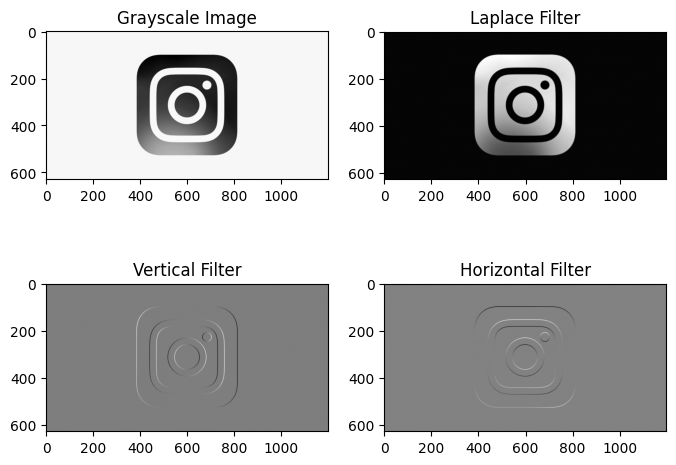

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = Image.open("data/ins.png")
image_arr = np.array(image)
Image.fromarray(image_arr)

plt.imshow(image)


filter_vertical = np.array([[-1, 0, 1], 
                            [-1, 0, 1], 
                            [-1, 0, 1]])
filter_horizontal = np.array([[1, 1, 1], 
                              [0, 0, 0],
                              [-1, -1, -1]])
laplace = np.array([[0, -1, 0],
                    [-1, 0, -1],
                    [0, -1, 0]])


print(image_arr.shape)

gray_im = .3*image_arr[:,:,0]+ .59*image_arr[:,:, 1] + .11*image_arr[:,:, 2]
print(gray_im.shape)

from scipy import signal
convo_out_v = signal.convolve2d(gray_im, filter_vertical, mode ='valid')
convo_out_h = signal.convolve2d(gray_im, filter_horizontal, mode = 'valid')
convo_out_lap = signal.convolve2d(gray_im, laplace, mode = 'valid')

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1) 
plt.imshow(gray_im, cmap = 'gray')
plt.title("Grayscale Image")

plt.subplot(2, 2, 2) 
plt.imshow((convo_out_lap), cmap = 'gray')
plt.title("Laplace Filter")

plt.subplot(2, 2, 3) 
plt.imshow((convo_out_v), cmap='gray')
plt.title("Vertical Filter")

plt.subplot(2, 2, 4) 
plt.imshow((convo_out_h), cmap = 'gray')
plt.title("Horizontal Filter")

Text(0.5, 1.0, 'Filtered Image')

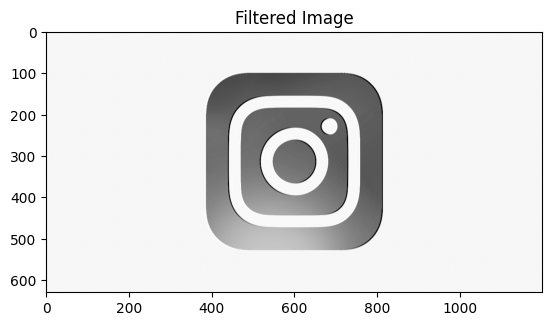

In [3]:
convo_out = signal.convolve2d(gray_im, filter_vertical, mode ='same')

convo_out = gray_im + convo_out
convo_out = np.clip(convo_out, 0, 255)
convo_out = convo_out.astype(np.uint8)

plt.figure()
plt.imshow(convo_out, cmap='gray')
plt.title("Filtered Image")
